In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')

# $I_1$

$$I_1 = \int_{0}^\infty \frac{w^2}{e^w - 1}dw$$

In [3]:
def func(w):
    num = w**2
    den = np.exp(w) - 1
    return num/den

In [4]:
w = np.linspace(0, 10, 1000)

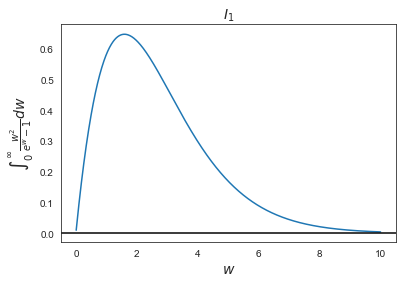

In [5]:
plt.figure()
plt.title("$I_1$", fontsize = 14)
plt.ylabel(r"$\int_{0}^\infty \frac{w^2}{e^w - 1}dw$", fontsize = 14)
plt.xlabel(r"$w$", fontsize = 14)
plt.plot(w, func(w))
plt.axhline(c='black')
plt.show()

We can take the grid: $$ a = 0 $$ $$ b = 10 $$ $$ LY = 0.7 .$$

In [6]:
from stat_mech_tools import monte_carlo_integration

In [7]:
# no. of different simulations
n = 100

# no. of points per simulation
N = 10000

In [8]:
areas = np.zeros(100)
for i in range(len(areas)):
    areas[i] = monte_carlo_integration(func, 0, 10, 0.7, N)

In [9]:
from stat_mech_tools import average_integrals

In [10]:
I_1_mean = average_integrals(areas, 100)
I_1_std = np.std(areas)
print("Mean of I_1 = {:.4} \nStandard deviation of I_1 = {:.3} \nParameters: \nNo. of simulations = {} \nNo. of points per simulation = {}".format(I_1_mean, I_1_std, n, N)) 

Mean of I_1 = 2.405 
Standard deviation of I_1 = 0.0294 
Parameters: 
No. of simulations = 100 
No. of points per simulation = 10000


We know that the theoretical value of $I_1$ is just $$\zeta (3) \times \Gamma (3),$$ or 
$$1.2020569... \times 2$$ $$\approx 2.404$$
This value is within our calculation of $I_1 = 2.40 \pm 0.04$.

In [11]:
# we now want to look at the rms deviation
# over a certain number of runs
from stat_mech_tools import std_integrals

In [12]:
# want to plot this as a function of N
# the no. of points used per simulation

num_points = 100 # no of points to plot
# linspace of points
points = np.linspace(100, 10000, num_points)

# create num_points x n array to fill
many_areas = np.zeros((100,100))

# fill each row with n areas corresponding to points[i] points
for i in range(num_points):
    N_to_use = int(points[i])
    for j in range(n):
        many_areas[i][j] = monte_carlo_integration(func, 0, 10, 0.7, N_to_use)

In [13]:
# calculate the "rms" (for lack of a better term)
# of each set of areas of a common N
# i.e of each row

# initialize
many_rms = np.zeros(num_points)

# fill
for i in range(num_points):
    many_rms[i] = std_integrals(many_areas[i], n)

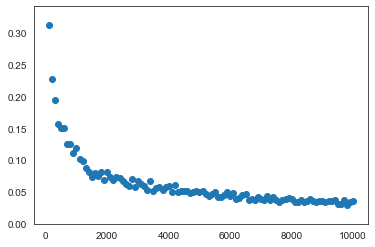

In [14]:
# quick peek
plt.scatter(points, many_rms)

In [15]:
def exp_fit(x, A, B):
    return A*np.power(x, -B)

In [16]:
from scipy.optimize import curve_fit

In [22]:
best_params, cov_params = curve_fit(exp_fit, xdata = points, ydata = many_rms, p0 = [1, 1e-2])
A = best_params[0]
B = best_params[1]
print("A = {:.3} \nB = {:.3}".format(A,B))

A = 2.97 
B = 0.484


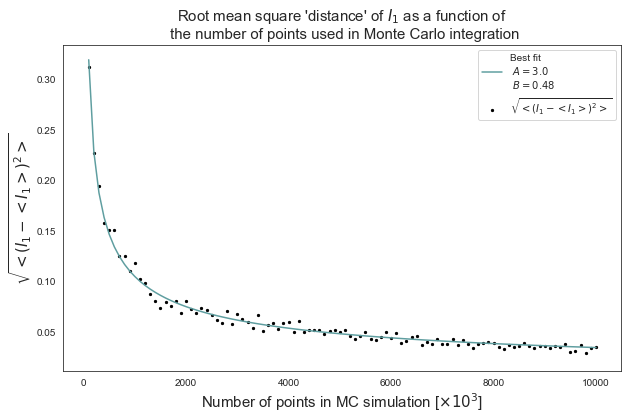

In [19]:
plt.figure(figsize = (10,6))
plt.title("Root mean square 'distance' of $I_1$ as a function of \n the number of points used in Monte Carlo integration", 
          fontsize=15)
plt.scatter(points, many_rms, c='black', s = 5, label = '$ \sqrt{< (I_1 - <I_1>)^2 >} $')
plt.plot(points, exp_fit(points, A, B), 
         label = 'Best fit \n $A = {:.2}$ \n $B ={:.2}$'.format(A, B),
        c = 'cadetblue')
plt.ylabel("$ \sqrt{< (I_1 - <I_1>)^2 >} $", fontsize=15)
plt.xlabel(r"Number of points in MC simulation [$ \times 10^3$]", fontsize=15)
plt.legend()
plt.show()

### Meaning of A & B








Variable $A$ is the amplitude of the curve. The bigger it is, the more our value of $I_1$ deviates from the average value $<I_1>$ (on average). 

Variable $B$ has to do with how sharp the "drop-off" of the curve is. The greater $B$ is, the quicker this will happen (i.e: we will need fewer points to get our values of $I_1$ to all be close to the average value and thus, get a good estimate of the integral). 

# $I_2$

$$I_2 = \int_{0}^\infty \frac{w^3}{e^w - 1}dw$$

In [24]:
def func2(w):
    num = w**3
    den = np.exp(w) - 1
    return num/den

In [25]:
w2 = np.linspace(0, 12, 1000)

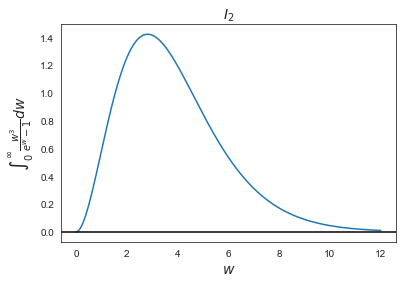

In [26]:
plt.figure()
plt.title("$I_2$", fontsize = 14)
plt.ylabel(r"$\int_{0}^\infty \frac{w^3}{e^w - 1}dw$", fontsize = 14)
plt.xlabel(r"$w$", fontsize = 14)
plt.plot(w2, func2(w2))
plt.axhline(c='black')
plt.show()

We can take the grid: $$ a = 0 $$ $$ b = 12 $$ $$ LY = 1.5 .$$

In [27]:
# no. of different simulations
n = 100

# no. of points per simulation
N = 10000

In [28]:
areas_2 = np.zeros(100)
for i in range(len(areas_2)):
    areas_2[i] = monte_carlo_integration(func2, 0, 12, 1.5, N)

In [29]:
I_2_mean = average_integrals(areas_2, 100)
I_2_std = np.std(areas_2)
print("Mean of I_2 = {:.3} \nStandard deviation of I_2 = {:.3} \nParameters: \nNo. of simulations = {} \nNo. of points per simulation = {}".format(I_2_mean, I_2_std, n, N)) 

Mean of I_2 = 6.47 
Standard deviation of I_2 = 0.0799 
Parameters: 
No. of simulations = 100 
No. of points per simulation = 10000


We know that the theoretical value of $I_1$ is just $$\zeta (4) \times \Gamma (4),$$ or 
$$1.082323... \times 6$$ $$\approx 6.4939$$
This value is within our calculation of $I_2 = 6.47 \pm 0.08$.

In [30]:
std_integrals(areas_2, n)

0.0798731619506828

In [31]:
# want to plot this as a function of N
# the no. of points used per simulation

# this can stay the same as before

num_points = 100 # no of points to plot
# linspace of points
points = np.linspace(100, 10000, num_points)

In [32]:
# create num_points x n array to fill
many_areas_2 = np.zeros((100,100))

# fill each row with n areas corresponding to points[i] points
for i in range(num_points):
    N_to_use = int(points[i])
    for j in range(n):
        many_areas_2[i][j] = monte_carlo_integration(func2, 0, 12, 1.5, N_to_use)

In [33]:
# calculate the "rms" (for lack of a better term)
# of each set of areas of a common N
# i.e of each row

# initialize
many_rms_2 = np.zeros(num_points)

# fill
for i in range(num_points):
    many_rms_2[i] = std_integrals(many_areas_2[i], n)

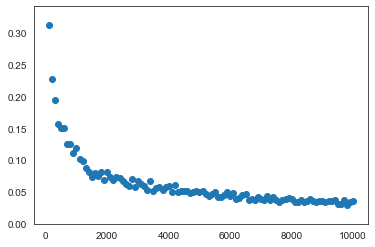

In [34]:
# quick peek
plt.scatter(points, many_rms)

In [35]:
# using the same fit as before
best_params_2, cov_params_2 = curve_fit(exp_fit, xdata = points, ydata = many_rms_2, p0 = [1e-1, 1e-3])
A2 = best_params_2[0]
B2 = best_params_2[1]
print("A = {:.3} \nB = {:.3}".format(A2,B2))

A = 8.02 
B = 0.493


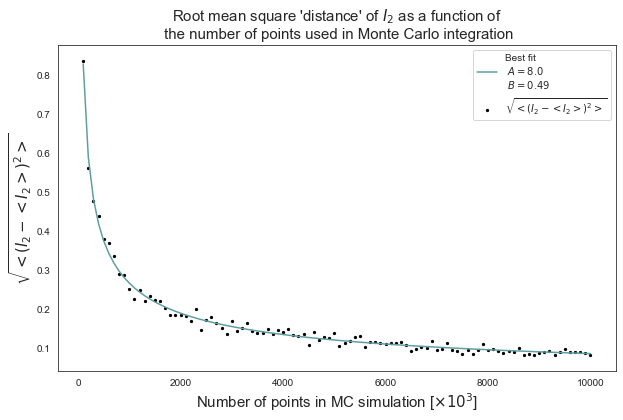

In [36]:
plt.figure(figsize = (10,6))
plt.title("Root mean square 'distance' of $I_2$ as a function of \n the number of points used in Monte Carlo integration", 
          fontsize=15)
plt.scatter(points, many_rms_2, c='black', s = 5, label = '$ \sqrt{< (I_2 - <I_2>)^2 >} $')
plt.plot(points, exp_fit(points, A2, B2), 
         label = 'Best fit \n $A = {:.2}$ \n $B ={:.2}$'.format(A2, B2),
        c = 'cadetblue')
plt.ylabel("$ \sqrt{< (I_2 - <I_2>)^2 >} $", fontsize=15)
plt.xlabel(r"Number of points in MC simulation [$ \times 10^3$]", fontsize=15)
plt.legend()
plt.show()

The meaning of $A$ and $B$ is the same as described for $I_1$ -- namely that $A$ is the amplitude of the curve (how long it takes for the different values of $I_2$ to converge to $<I_2>$ on average) and $B$ is the rapidity of its "fall-off" (how much this convergence changes as we increase the number of points in a simulation).